In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import os;
os.listdir('/kaggle/input/')

['test-file']

In [4]:
df=pd.read_csv("/kaggle/input/test-file/tested.csv")
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [5]:
df.shape

(418, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200

In [8]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

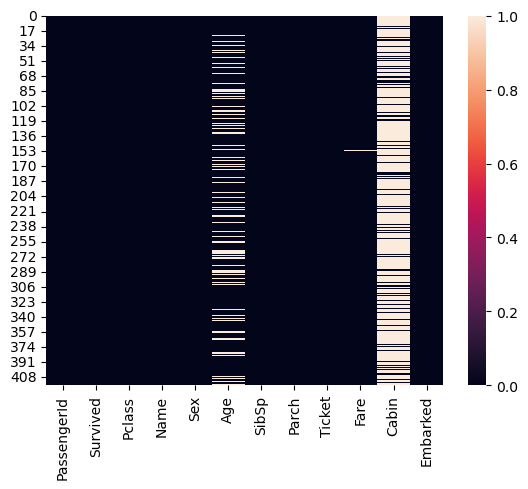

In [9]:
sns.heatmap(df.isnull())

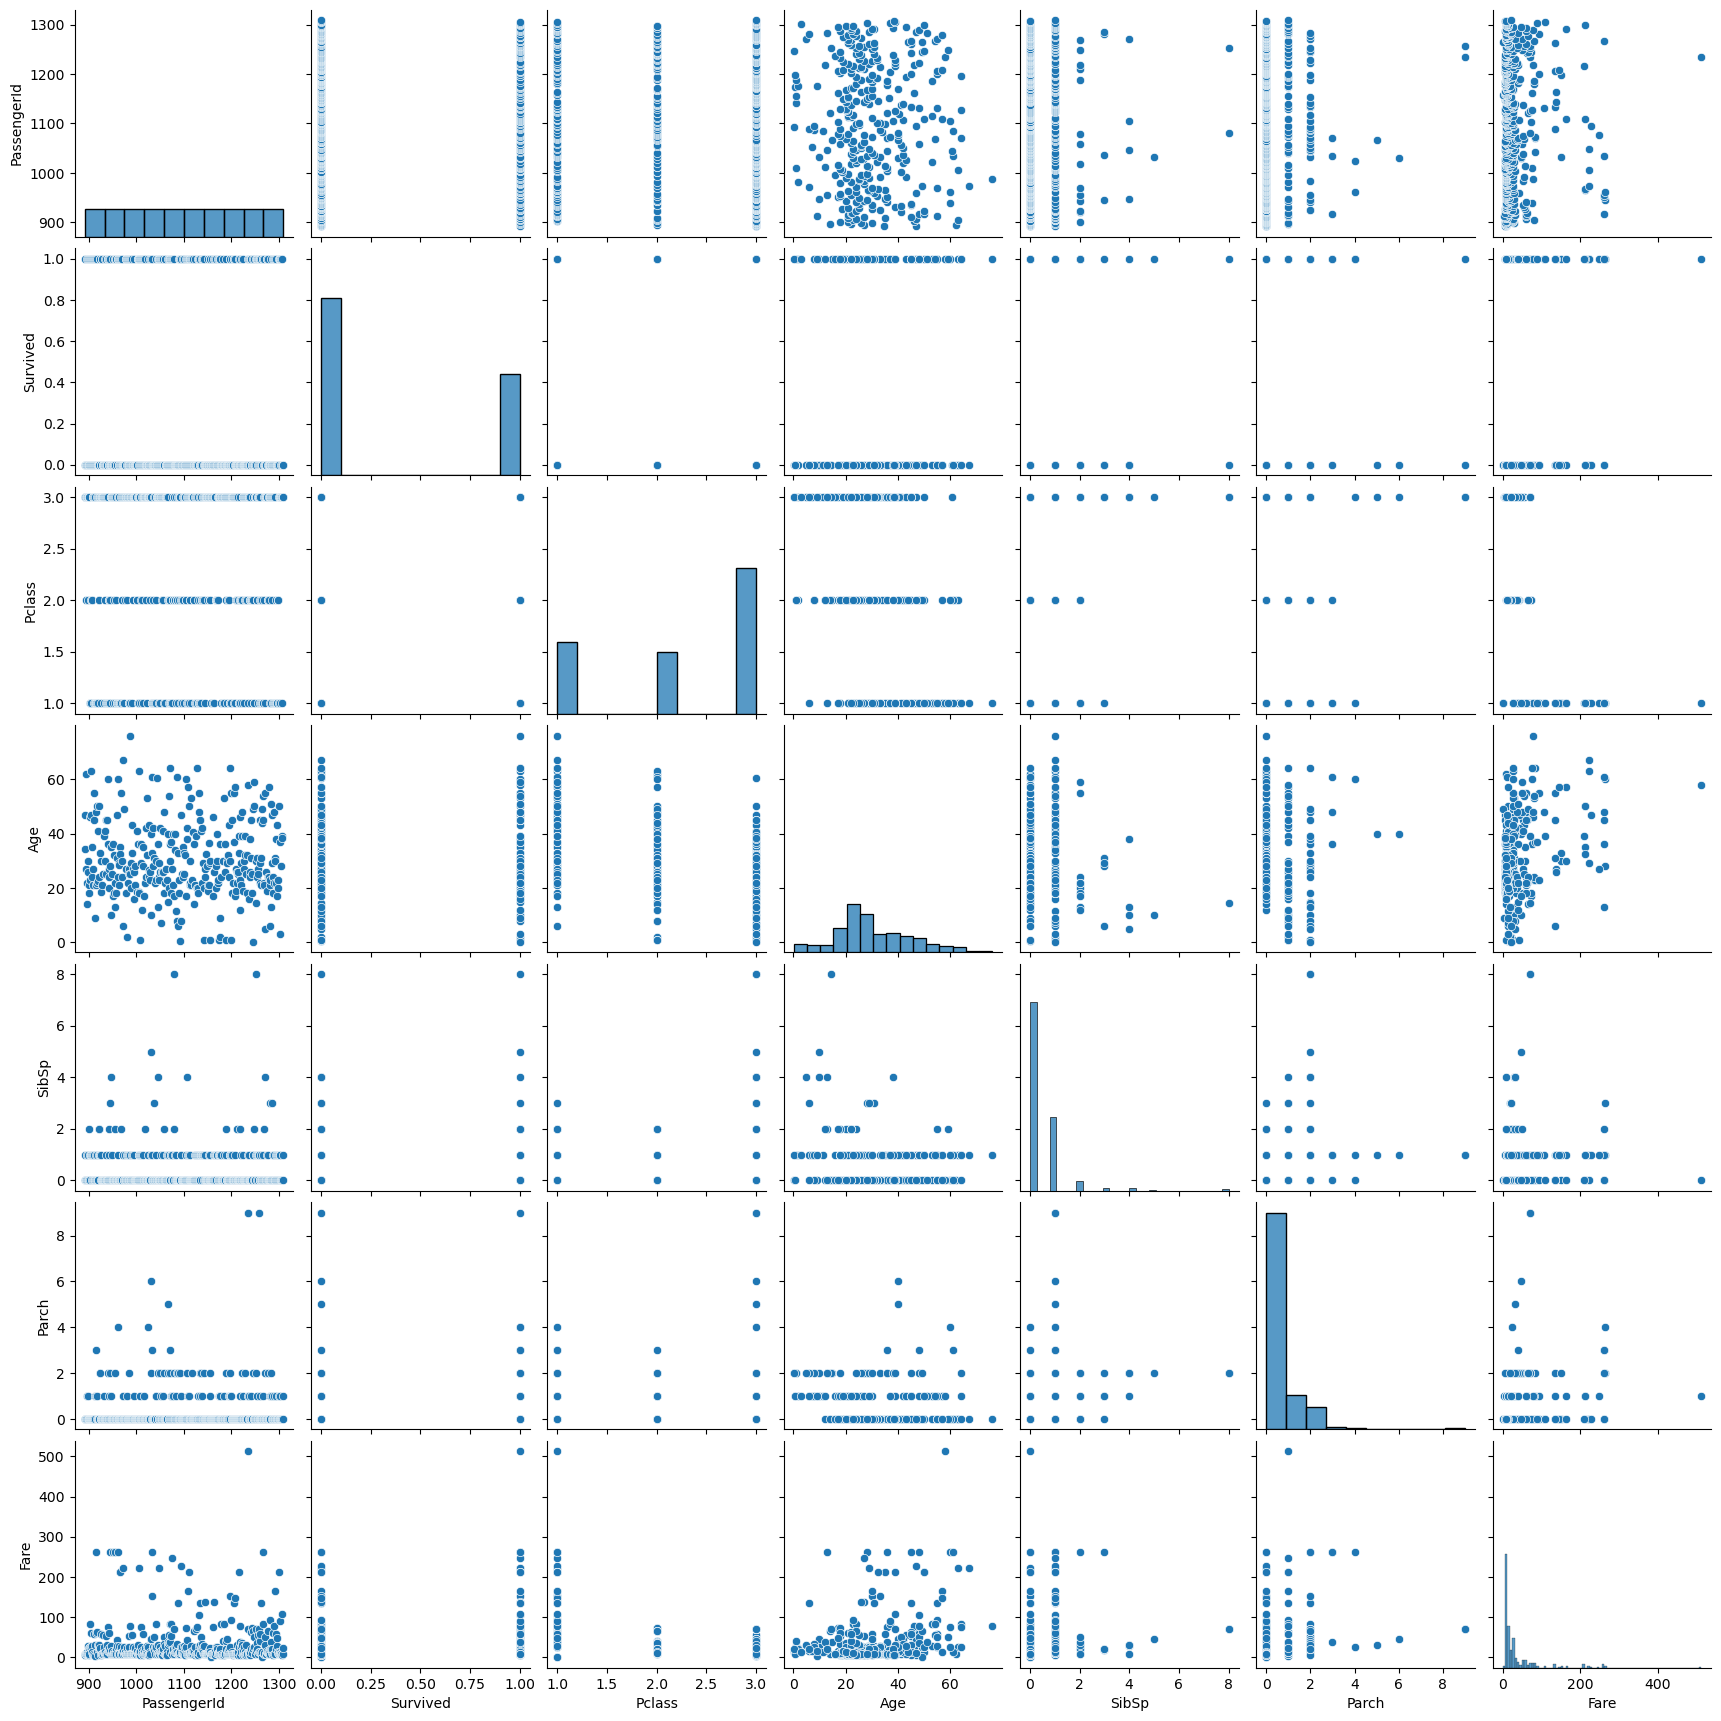

In [10]:
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

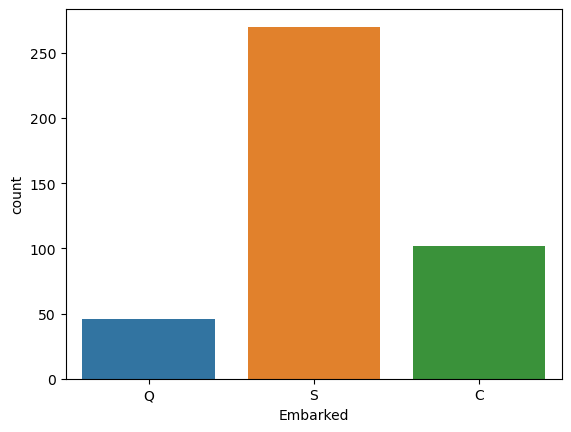

In [11]:
sns.countplot(data=df,x="Embarked")

In [12]:
df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.023245 -0.026751 -0.034102  0.003818  0.043080   
Survived       -0.023245  1.000000 -0.108615 -0.000013  0.099943  0.159120   
Pclass         -0.026751 -0.108615  1.000000 -0.492143  0.001087  0.018721   
Age            -0.034102 -0.000013 -0.492143  1.000000 -0.091587 -0.061249   
SibSp           0.003818  0.099943  0.001087 -0.091587  1.000000  0.306895   
Parch           0.043080  0.159120  0.018721 -0.061249  0.306895  1.000000   
Fare            0.008211  0.191514 -0.577147  0.337932  0.171539  0.230046   

                 Fare  
PassengerId  0.008211  
Survived     0.191514  
Pclass      -0.577147  
Age          0.337932  
SibSp        0.171539  
Parch        0.230046  
Fare         1.000000

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df1= df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)
df1

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0           0       3    male  34.5      0      0    7.8292        Q
1           1       3  female  47.0      1      0    7.0000        S
2           0       2    male  62.0      0      0    9.6875        Q
3           0       3    male  27.0      0      0    8.6625        S
4           1       3  female  22.0      1      1   12.2875        S
..        ...     ...     ...   ...    ...    ...       ...      ...
413         0       3    male   NaN      0      0    8.0500        S
414         1       1  female  39.0      0      0  108.9000        C
415         0       3    male  38.5      0      0    7.2500        S
416         0       3    male   NaN      0      0    8.0500        S
417         0       3    male   NaN      1      1   22.3583        C

[418 rows x 8 columns]

In [15]:
gender=pd.get_dummies(df1["Sex"],drop_first=True)
gender

male
0       1
1       0
2       1
3       1
4       0
..    ...
413     1
414     0
415     1
416     1
417     1

[418 rows x 1 columns]

In [16]:
emb = pd.get_dummies(df1["Embarked"],drop_first=True)
emb

Q  S
0    1  0
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[418 rows x 2 columns]

<AxesSubplot:>

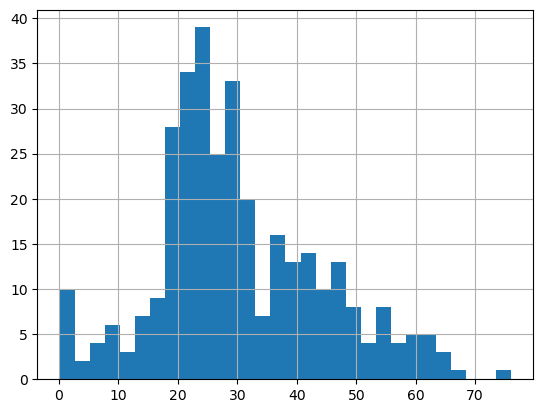

In [17]:
df["Age"].hist(bins=30)

<AxesSubplot:>

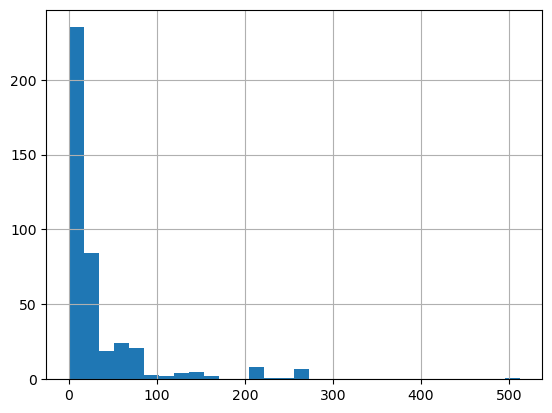

In [18]:
df["Fare"].hist(bins=30)

In [19]:
df=pd.read_csv('/kaggle/input/test-file/tested.csv',usecols=['Age'])
df.head()

Age
0  34.5
1  47.0
2  62.0
3  27.0
4  22.0

In [20]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [21]:
df['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [22]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['Age_sc']=sc.fit_transform(df[["Age"]])
df

Age    Age_sc
0    34.5  0.386231
1    47.0  1.371370
2    62.0  2.553537
3    27.0 -0.204852
4    22.0 -0.598908
..    ...       ...
413  27.0 -0.204852
414  39.0  0.740881
415  38.5  0.701476
416  27.0 -0.204852
417  27.0 -0.204852

[418 rows x 2 columns]

In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df['Age_mm']=min_max.fit_transform(df[['Age']])
df

Age    Age_sc    Age_mm
0    34.5  0.386231  0.452723
1    47.0  1.371370  0.617566
2    62.0  2.553537  0.815377
3    27.0 -0.204852  0.353818
4    22.0 -0.598908  0.287881
..    ...       ...       ...
413  27.0 -0.204852  0.353818
414  39.0  0.740881  0.512066
415  38.5  0.701476  0.505473
416  27.0 -0.204852  0.353818
417  27.0 -0.204852  0.353818

[418 rows x 3 columns]